In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Rice production data downloaded from FAOSTAT database (https://www.fao.org/faostat/en/#data/QCL). Rice, paddy (rice milled equivalent) was chosen for all countries and years available. Area harvest, production quantity, and yield data were downloaded.

In [73]:
rice = pd.read_csv('/content/drive/MyDrive/DS4A-W_Team25/Colab_Files/data/FAOSTAT_rice_production_1961-2019.csv')

In [74]:
rice.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,AFG,Afghanistan,5510,Production,30,"Rice, paddy (rice milled equivalent)",1961,1961,tonnes,212773.0,Fc,Calculated data
1,QCL,Crops and livestock products,AFG,Afghanistan,5510,Production,30,"Rice, paddy (rice milled equivalent)",1962,1962,tonnes,212773.0,Fc,Calculated data
2,QCL,Crops and livestock products,AFG,Afghanistan,5510,Production,30,"Rice, paddy (rice milled equivalent)",1963,1963,tonnes,212773.0,Fc,Calculated data
3,QCL,Crops and livestock products,AFG,Afghanistan,5510,Production,30,"Rice, paddy (rice milled equivalent)",1964,1964,tonnes,253460.0,Fc,Calculated data
4,QCL,Crops and livestock products,AFG,Afghanistan,5510,Production,30,"Rice, paddy (rice milled equivalent)",1965,1965,tonnes,253460.0,Fc,Calculated data


In [75]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7036 entries, 0 to 7035
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       7036 non-null   object 
 1   Domain            7036 non-null   object 
 2   Area Code (ISO3)  7036 non-null   object 
 3   Area              7036 non-null   object 
 4   Element Code      7036 non-null   int64  
 5   Element           7036 non-null   object 
 6   Item Code (FAO)   7036 non-null   int64  
 7   Item              7036 non-null   object 
 8   Year Code         7036 non-null   int64  
 9   Year              7036 non-null   int64  
 10  Unit              7036 non-null   object 
 11  Value             6882 non-null   float64
 12  Flag              7036 non-null   object 
 13  Flag Description  7036 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 769.7+ KB


In [76]:
rice.columns = rice.columns.str.lower()

In [77]:
rice.columns = ['domain_code',
 'domain',
 'iso',
 'country',
 'element_code',
 'element',
 'item_code_(fao)',
 'item',
 'year_code',
 'year',
 'unit',
 'value',
 'flag',
 'flag_description']

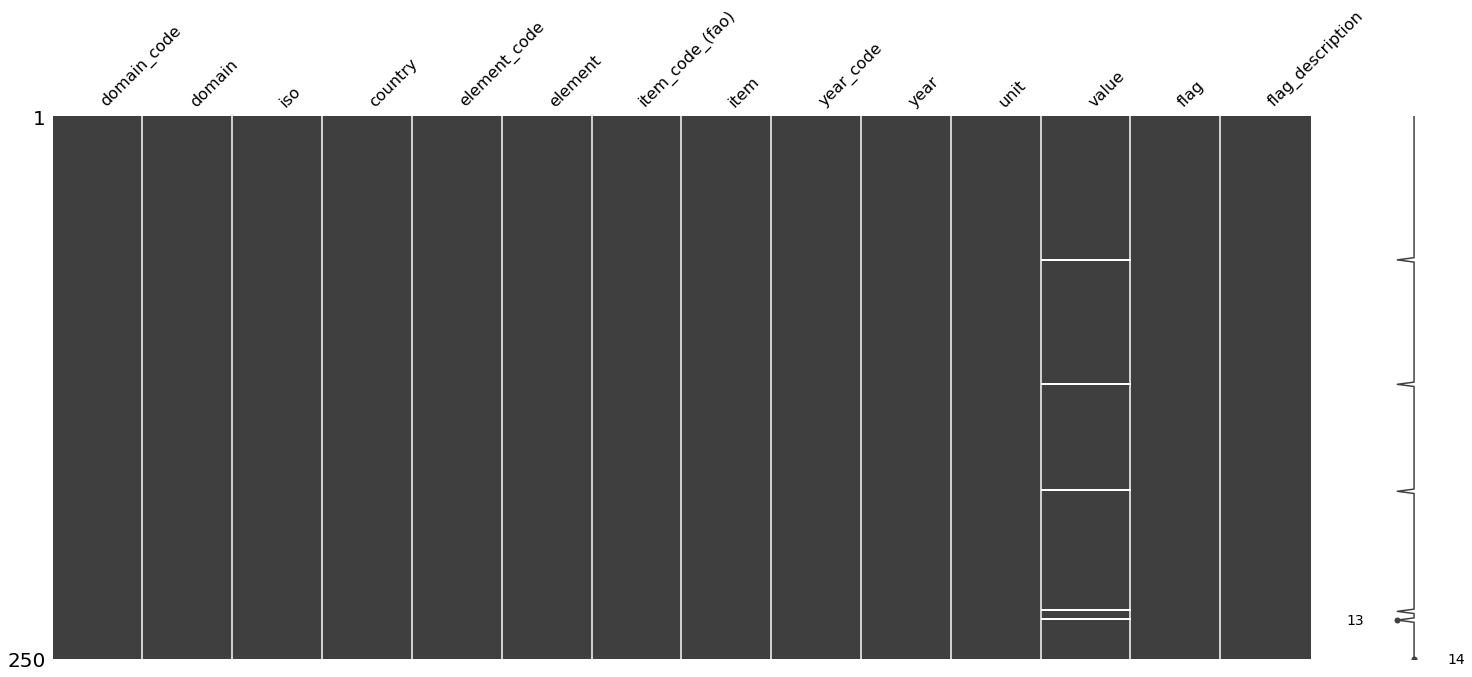

In [78]:
# checking for missing data
msno.matrix(rice.sample(250));

It doesn't look like there are a lot of missing data.

In [79]:
# checking if all unites are the same
rice['unit'].unique()

array(['tonnes'], dtype=object)

In [80]:
# how many different type of flags?
rice['flag'].unique()

array(['Fc'], dtype=object)

In [81]:
# what does 'Fc' mean?
rice['flag_description'].unique()

array(['Calculated data'], dtype=object)

In [82]:
# are there data other than 'production'?
rice['element'].unique()

array(['Production'], dtype=object)

It looks like all production weight entries are consistent across.

In [83]:
# how many countries?
rice['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Azerbaijan', 'Bangladesh', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guyana', 'Gabon', 'Gambia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'India', 'Indonesia'

In [84]:
# how many countries?
rice['iso'].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AUS', 'AZE', 'BGD',
       'BEL', 'BLZ', 'BEN', 'BTN', 'BOL', 'BRA', 'BRN', 'BGR', 'BFA',
       'BDI', 'KHM', 'CMR', 'CAF', 'TCD', 'CHL', 'CHN', 'HKG', '41',
       'TWN', 'COL', 'COM', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP',
       'CZE', 'PRK', 'COD', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV', 'EST',
       'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GUF', 'GAB', 'GMB', 'DEU',
       'GHA', 'GRC', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ITA', 'JAM', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'LAO', 'LVA', 'LBR', 'LTU', 'LUX', 'MDG', 'MWI',
       'MYS', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'FSM', 'MAR', 'MOZ',
       'MMR', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'PAK',
       'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'PRI', 'KOR',
       'MDA', 'REU', 'ROU', 'RUS', 'RWA', 'VCT', 'SAU', 'SEN', 'SLE',
       'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SSD', 'ESP', 'LKA', 'SDN',
       '206', 'SUR', 

In [85]:
# how many countries?
len(rice['iso'].unique())

149

In [86]:
rice[rice['iso'] == 'SVN']

,domain_code,domain,iso,country,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
5627,QCL,Crops and livestock products,SVN,Slovenia,5510,Production,30,"Rice, paddy (rice milled equivalent)",2018,2018,tonnes,0.0,Fc,Calculated data
5628,QCL,Crops and livestock products,SVN,Slovenia,5510,Production,30,"Rice, paddy (rice milled equivalent)",2019,2019,tonnes,0.0,Fc,Calculated data


In [87]:
rice[rice['iso'] == 'HRV']

,domain_code,domain,iso,country,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
1824,QCL,Crops and livestock products,HRV,Croatia,5510,Production,30,"Rice, paddy (rice milled equivalent)",2018,2018,tonnes,0.0,Fc,Calculated data
1825,QCL,Crops and livestock products,HRV,Croatia,5510,Production,30,"Rice, paddy (rice milled equivalent)",2019,2019,tonnes,0.0,Fc,Calculated data


In [88]:
rice[rice['iso'] == 'MKD']

,domain_code,domain,iso,country,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
4686,QCL,Crops and livestock products,MKD,North Macedonia,5510,Production,30,"Rice, paddy (rice milled equivalent)",1992,1992,tonnes,28480.0,Fc,Calculated data
4687,QCL,Crops and livestock products,MKD,North Macedonia,5510,Production,30,"Rice, paddy (rice milled equivalent)",1993,1993,tonnes,6292.0,Fc,Calculated data
4688,QCL,Crops and livestock products,MKD,North Macedonia,5510,Production,30,"Rice, paddy (rice milled equivalent)",1994,1994,tonnes,5812.0,Fc,Calculated data
4689,QCL,Crops and livestock products,MKD,North Macedonia,5510,Production,30,"Rice, paddy (rice milled equivalent)",1995,1995,tonnes,4300.0,Fc,Calculated data
4690,QCL,Crops and livestock products,MKD,North Macedonia,5510,Production,30,"Rice, paddy (rice milled equivalent)",1996,1996,tonnes,14857.0,Fc,Calculated data
4691,QCL,Crops and livestock products,MKD,North Macedonia,5510,Production,30,"Rice, paddy (rice milled equivalent)",1997,1997,tonnes,16408.0,Fc,Calculated data
4692,QCL,Crops and livestock products,MKD,North Macedonia,5510,Production,30,"Rice, paddy (rice milled equivalent)",1998,1998,tonnes,15116.0,Fc,Calculated data
4693,QCL,Crops and livestock products,MKD,North Macedonia,5510,Production,30,"Rice, paddy (rice milled equivalent)",1999,1999,tonnes,11626.0,Fc,Calculated data
4694,QCL,Crops and livestock products,MKD,North Macedonia,5510,Production,30,"Rice, paddy (rice milled equivalent)",2000,2000,tonnes,12295.0,Fc,Calculated data
4695,QCL,Crops and livestock products,MKD,North Macedonia,5510,Production,30,"Rice, paddy (rice milled equivalent)",2001,2001,tonnes,5269.0,Fc,Calculated data


In [89]:
# how many countries?
len(rice['iso'].unique())

149

In [90]:
# There are some numbers in the iso column
rice[(rice['iso'] == '41') | (rice['iso'] == '206') | (rice['iso'] == '248')]

,domain_code,domain,iso,country,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
1411,QCL,Crops and livestock products,41,"China, mainland",5510,Production,30,"Rice, paddy (rice milled equivalent)",1961,1961,tonnes,35777880.0,Fc,Calculated data
1412,QCL,Crops and livestock products,41,"China, mainland",5510,Production,30,"Rice, paddy (rice milled equivalent)",1962,1962,tonnes,42011000.0,Fc,Calculated data
1413,QCL,Crops and livestock products,41,"China, mainland",5510,Production,30,"Rice, paddy (rice milled equivalent)",1963,1963,tonnes,49201260.0,Fc,Calculated data
1414,QCL,Crops and livestock products,41,"China, mainland",5510,Production,30,"Rice, paddy (rice milled equivalent)",1964,1964,tonnes,55361000.0,Fc,Calculated data
1415,QCL,Crops and livestock products,41,"China, mainland",5510,Production,30,"Rice, paddy (rice milled equivalent)",1965,1965,tonnes,58509240.0,Fc,Calculated data
1416,QCL,Crops and livestock products,41,"China, mainland",5510,Production,30,"Rice, paddy (rice milled equivalent)",1966,1966,tonnes,63625130.0,Fc,Calculated data
1417,QCL,Crops and livestock products,41,"China, mainland",5510,Production,30,"Rice, paddy (rice milled equivalent)",1967,1967,tonnes,62487900.0,Fc,Calculated data
1418,QCL,Crops and livestock products,41,"China, mainland",5510,Production,30,"Rice, paddy (rice milled equivalent)",1968,1968,tonnes,63051510.0,Fc,Calculated data
1419,QCL,Crops and livestock products,41,"China, mainland",5510,Production,30,"Rice, paddy (rice milled equivalent)",1969,1969,tonnes,63408360.0,Fc,Calculated data
1420,QCL,Crops and livestock products,41,"China, mainland",5510,Production,30,"Rice, paddy (rice milled equivalent)",1970,1970,tonnes,73363330.0,Fc,Calculated data


In [91]:
rice[rice['country'].str.startswith('China')]['iso'].unique()

array(['CHN', 'HKG', '41', 'TWN'], dtype=object)

In [92]:
rpc = rice.groupby(['country', 'year']).sum()[['value']]

In [93]:
rice[rice['iso'] == 'CHN'][['value']].sum()

value    6.372874e+09
dtype: float64

In [94]:
mainland = rice[rice['iso'] == '41'][['value']].sum()

In [95]:
hk = rice[rice['iso'] == 'HKG'][['value']].sum()

In [96]:
tw = rice[rice['iso'] == 'TWN'][['value']].sum()

In [97]:
mainland + hk + tw

value    6.372874e+09
dtype: float64

China is the collection of mainland China, Hong Kong, and Taiwan, so drop China and keep the rest and rename them.

In [98]:
rice.drop(rice[rice['country'] == 'China'].index, inplace = True)

In [99]:
rice[rice['country'].str.startswith('China')]['country'].unique()

array(['China, Hong Kong SAR', 'China, mainland',
       'China, Taiwan Province of'], dtype=object)

In [100]:
# rename Hong Kong, China mainland, and Taiwan
rice['country'].replace('China, Hong Kong SAR', 'Hong Kong', inplace=True)
rice['country'].replace('China, mainland', 'China', inplace=True)
rice['country'].replace('China, Taiwan Province of', 'Taiwan', inplace=True)

In [101]:
# which country is 206?
rice[rice['iso'] == '206']

,domain_code,domain,iso,country,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
5931,QCL,Crops and livestock products,206,Sudan (former),5510,Production,30,"Rice, paddy (rice milled equivalent)",1961,1961,tonnes,1288.0,Fc,Calculated data
5932,QCL,Crops and livestock products,206,Sudan (former),5510,Production,30,"Rice, paddy (rice milled equivalent)",1962,1962,tonnes,633.0,Fc,Calculated data
5933,QCL,Crops and livestock products,206,Sudan (former),5510,Production,30,"Rice, paddy (rice milled equivalent)",1963,1963,tonnes,722.0,Fc,Calculated data
5934,QCL,Crops and livestock products,206,Sudan (former),5510,Production,30,"Rice, paddy (rice milled equivalent)",1964,1964,tonnes,642.0,Fc,Calculated data
5935,QCL,Crops and livestock products,206,Sudan (former),5510,Production,30,"Rice, paddy (rice milled equivalent)",1965,1965,tonnes,747.0,Fc,Calculated data
5936,QCL,Crops and livestock products,206,Sudan (former),5510,Production,30,"Rice, paddy (rice milled equivalent)",1966,1966,tonnes,263.0,Fc,Calculated data
5937,QCL,Crops and livestock products,206,Sudan (former),5510,Production,30,"Rice, paddy (rice milled equivalent)",1967,1967,tonnes,1191.0,Fc,Calculated data
5938,QCL,Crops and livestock products,206,Sudan (former),5510,Production,30,"Rice, paddy (rice milled equivalent)",1968,1968,tonnes,650.0,Fc,Calculated data
5939,QCL,Crops and livestock products,206,Sudan (former),5510,Production,30,"Rice, paddy (rice milled equivalent)",1969,1969,tonnes,1938.0,Fc,Calculated data
5940,QCL,Crops and livestock products,206,Sudan (former),5510,Production,30,"Rice, paddy (rice milled equivalent)",1970,1970,tonnes,4067.0,Fc,Calculated data


In [102]:
rice[rice['country'] == 'Sudan']

,domain_code,domain,iso,country,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
5923,QCL,Crops and livestock products,SDN,Sudan,5510,Production,30,"Rice, paddy (rice milled equivalent)",2012,2012,tonnes,16008.0,Fc,Calculated data
5924,QCL,Crops and livestock products,SDN,Sudan,5510,Production,30,"Rice, paddy (rice milled equivalent)",2013,2013,tonnes,16675.0,Fc,Calculated data
5925,QCL,Crops and livestock products,SDN,Sudan,5510,Production,30,"Rice, paddy (rice milled equivalent)",2014,2014,tonnes,11272.0,Fc,Calculated data
5926,QCL,Crops and livestock products,SDN,Sudan,5510,Production,30,"Rice, paddy (rice milled equivalent)",2015,2015,tonnes,21344.0,Fc,Calculated data
5927,QCL,Crops and livestock products,SDN,Sudan,5510,Production,30,"Rice, paddy (rice milled equivalent)",2016,2016,tonnes,18676.0,Fc,Calculated data
5928,QCL,Crops and livestock products,SDN,Sudan,5510,Production,30,"Rice, paddy (rice milled equivalent)",2017,2017,tonnes,21344.0,Fc,Calculated data
5929,QCL,Crops and livestock products,SDN,Sudan,5510,Production,30,"Rice, paddy (rice milled equivalent)",2018,2018,tonnes,20010.0,Fc,Calculated data
5930,QCL,Crops and livestock products,SDN,Sudan,5510,Production,30,"Rice, paddy (rice milled equivalent)",2019,2019,tonnes,21344.0,Fc,Calculated data


In [103]:
# Former Sudan was split into Sudan and South Sudan. However, given that there is no data for South Sudan, 
# I will treat former Sudan the same as current Sudan and give `SDN` iso code
rice['iso'].replace({'206': 'SDN'}, inplace=True)

In [104]:
# what is 248?
rice[rice['iso'] == '248']['country'].unique()

array(['Yugoslav SFR'], dtype=object)

In [105]:
rice[rice['iso'] == '248']['year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991])

In [106]:
# Former Yugoslavia is now Slovania, Croatia, Bosnia & Herzegovina, Serbia, Montenegro, Kosovo, North Macedonia, and Vojvodina
# For simplification purposes former Yugoslavia will be assigned the former code 'YUG' 
rice['iso'].replace({'248': 'YUG'}, inplace=True)

In [107]:
rice[rice['iso'] == 'YUG']['year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991])

In [108]:
rice[rice['iso'] == 'CAN']

,domain_code,domain,iso,country,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description


In [109]:
rice[rice['country'] == 'Ireland']

,domain_code,domain,iso,country,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
3386,QCL,Crops and livestock products,IRL,Ireland,5510,Production,30,"Rice, paddy (rice milled equivalent)",2018,2018,tonnes,0.0,Fc,Calculated data
3387,QCL,Crops and livestock products,IRL,Ireland,5510,Production,30,"Rice, paddy (rice milled equivalent)",2019,2019,tonnes,0.0,Fc,Calculated data


In [110]:
len(rice['iso'].unique())

147

In [111]:
# Looking at the top producers
total_production = rice.groupby(['iso', 'country']).sum()
total_production

,,element_code,item_code_(fao),year_code,year,value
iso,country,,,,,
228,USSR,170810,930,61256,61256,3.415013e+07
41,China,325090,1770,117410,117410,6.280747e+09
AFG,Afghanistan,325090,1770,117410,117410,1.579573e+07
AGO,Angola,325090,1770,117410,117410,6.166320e+05
ALB,Albania,325090,1770,117410,117410,2.333560e+05
ARG,Argentina,325090,1770,117410,117410,2.812918e+07
ARM,Armenia,132240,720,48180,48180,0.000000e+00
AUS,Australia,325090,1770,117410,117410,2.438348e+07
AZE,Azerbaijan,154280,840,56154,56154,1.516190e+05


In [112]:
!pip install geopandas

In [113]:
import geopandas

In [114]:
pd.set_option('display.max_rows', 500)

In [115]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world[['name','iso_a3']]

,name,iso_a3
0,Fiji,FJI
1,Tanzania,TZA
2,W. Sahara,ESH
3,Canada,CAN
4,United States of America,USA
5,Kazakhstan,KAZ
6,Uzbekistan,UZB
7,Papua New Guinea,PNG
8,Indonesia,IDN
9,Argentina,ARG


In [116]:
world_iso = set(world['iso_a3'])

In [117]:
rice_iso = set(rice['iso'])

In [118]:
world_iso.difference(rice_iso)

{'-99',
 'ARE',
 'ATA',
 'ATF',
 'AUT',
 'BHS',
 'BIH',
 'BLR',
 'BWA',
 'CAN',
 'CHE',
 'CHN',
 'DJI',
 'ERI',
 'ESH',
 'FLK',
 'GBR',
 'GEO',
 'GNQ',
 'GRL',
 'ISL',
 'ISR',
 'JOR',
 'KWT',
 'LBN',
 'LBY',
 'LSO',
 'MNE',
 'MNG',
 'NAM',
 'NCL',
 'OMN',
 'PSE',
 'QAT',
 'SRB',
 'TUN',
 'VUT',
 'YEM'}

In [119]:
rice_iso.difference(world_iso)

{'228',
 '41',
 'COM',
 'FRA',
 'FSM',
 'GUF',
 'HKG',
 'MLT',
 'MUS',
 'REU',
 'VCT',
 'YUG'}

In [120]:
rice['iso'].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AUS', 'AZE', 'BGD',
       'BEL', 'BLZ', 'BEN', 'BTN', 'BOL', 'BRA', 'BRN', 'BGR', 'BFA',
       'BDI', 'KHM', 'CMR', 'CAF', 'TCD', 'CHL', 'HKG', '41', 'TWN',
       'COL', 'COM', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE',
       'PRK', 'COD', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV', 'EST', 'SWZ',
       'ETH', 'FJI', 'FIN', 'FRA', 'GUF', 'GAB', 'GMB', 'DEU', 'GHA',
       'GRC', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'IND',
       'IDN', 'IRN', 'IRQ', 'IRL', 'ITA', 'JAM', 'JPN', 'KAZ', 'KEN',
       'KGZ', 'LAO', 'LVA', 'LBR', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS',
       'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'FSM', 'MAR', 'MOZ', 'MMR',
       'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'PAK', 'PAN',
       'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'PRI', 'KOR', 'MDA',
       'REU', 'ROU', 'RUS', 'RWA', 'VCT', 'SAU', 'SEN', 'SLE', 'SVK',
       'SVN', 'SLB', 'SOM', 'ZAF', 'SSD', 'ESP', 'LKA', 'SDN', 'SUR',
       'SWE', 'SYR', 

In [121]:
# reassign 41 as CHN
rice['iso'].replace({'41': 'CHN'}, inplace=True)

In [122]:
rice['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Azerbaijan', 'Bangladesh', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Chile', 'Hong Kong', 'China', 'Taiwan', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guyana', 'Gabon', 'Gambia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland'

In [123]:
# rename Sudan (former) to Sudan, Venezuela (Bolivarian Republic of) to Venezuela, Iran (Islamic Republic of) to Iran
# Bolivia (Plurinational State of) to Bolvia, 'Viet Nam' to 'Vietnam'
new_names = {
    'Sudan (former)': 'Sudan', 'Venezuela (Bolivarian Republic of)': 'Venezuela', 'Iran (Islamic Republic of)': 'Iran',
    'Bolivia (Plurinational State of)': 'Bolivia', 'Viet Nam': 'Vietnam'
    }
rice['country'].replace(new_names, inplace=True)

In [124]:
rice[rice['country'] == 'USSR']

,domain_code,domain,iso,country,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
6717,QCL,Crops and livestock products,228,USSR,5510,Production,30,"Rice, paddy (rice milled equivalent)",1961,1961,tonnes,153077.0,Fc,Calculated data
6718,QCL,Crops and livestock products,228,USSR,5510,Production,30,"Rice, paddy (rice milled equivalent)",1962,1962,tonnes,168751.0,Fc,Calculated data
6719,QCL,Crops and livestock products,228,USSR,5510,Production,30,"Rice, paddy (rice milled equivalent)",1963,1963,tonnes,233450.0,Fc,Calculated data
6720,QCL,Crops and livestock products,228,USSR,5510,Production,30,"Rice, paddy (rice milled equivalent)",1964,1964,tonnes,292146.0,Fc,Calculated data
6721,QCL,Crops and livestock products,228,USSR,5510,Production,30,"Rice, paddy (rice milled equivalent)",1965,1965,tonnes,361848.0,Fc,Calculated data
6722,QCL,Crops and livestock products,228,USSR,5510,Production,30,"Rice, paddy (rice milled equivalent)",1966,1966,tonnes,441554.0,Fc,Calculated data
6723,QCL,Crops and livestock products,228,USSR,5510,Production,30,"Rice, paddy (rice milled equivalent)",1967,1967,tonnes,555611.0,Fc,Calculated data
6724,QCL,Crops and livestock products,228,USSR,5510,Production,30,"Rice, paddy (rice milled equivalent)",1968,1968,tonnes,659663.0,Fc,Calculated data
6725,QCL,Crops and livestock products,228,USSR,5510,Production,30,"Rice, paddy (rice milled equivalent)",1969,1969,tonnes,686343.0,Fc,Calculated data
6726,QCL,Crops and livestock products,228,USSR,5510,Production,30,"Rice, paddy (rice milled equivalent)",1970,1970,tonnes,793730.0,Fc,Calculated data


In [125]:
rice[rice['country'] == 'USSR']['year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991])

In [126]:
rice[rice['iso'] == 'RUS']['year'].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019])

Former USSR will be assigned 'SUN' code 

In [127]:
rice['iso'].replace({'228': 'SUN'}, inplace=True)

In [128]:
# keep only production data
rice_production = rice[['iso','country', 'year', 'value']]

In [129]:
rice_production.head()

,iso,country,year,value
0,AFG,Afghanistan,1961,212773.0
1,AFG,Afghanistan,1962,212773.0
2,AFG,Afghanistan,1963,212773.0
3,AFG,Afghanistan,1964,253460.0
4,AFG,Afghanistan,1965,253460.0


In [130]:
rice['year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

In [131]:
# rename value to be descriptive
rice_production.rename(columns={'value': 'rice_production_in_tonnes'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [132]:
rice_production['iso'].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AUS', 'AZE', 'BGD',
       'BEL', 'BLZ', 'BEN', 'BTN', 'BOL', 'BRA', 'BRN', 'BGR', 'BFA',
       'BDI', 'KHM', 'CMR', 'CAF', 'TCD', 'CHL', 'HKG', 'CHN', 'TWN',
       'COL', 'COM', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE',
       'PRK', 'COD', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV', 'EST', 'SWZ',
       'ETH', 'FJI', 'FIN', 'FRA', 'GUF', 'GAB', 'GMB', 'DEU', 'GHA',
       'GRC', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'IND',
       'IDN', 'IRN', 'IRQ', 'IRL', 'ITA', 'JAM', 'JPN', 'KAZ', 'KEN',
       'KGZ', 'LAO', 'LVA', 'LBR', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS',
       'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'FSM', 'MAR', 'MOZ', 'MMR',
       'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'PAK', 'PAN',
       'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'PRI', 'KOR', 'MDA',
       'REU', 'ROU', 'RUS', 'RWA', 'VCT', 'SAU', 'SEN', 'SLE', 'SVK',
       'SVN', 'SLB', 'SOM', 'ZAF', 'SSD', 'ESP', 'LKA', 'SDN', 'SUR',
       'SWE', 'SYR',

In [133]:
rice_production.to_csv('/content/drive/MyDrive/DS4A-W_Team25/Colab_Files/data/global_data/rice_production.csv', index=False)

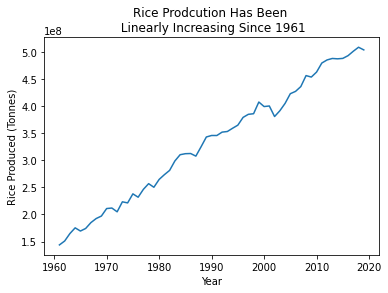

In [134]:
rice_production.groupby('year').sum().plot(legend=False)
plt.title('Rice Prodcution Has Been \n Linearly Increasing Since 1961')
plt.xlabel('Year')
plt.ylabel('Rice Produced (Tonnes)')
plt.savefig('/content/drive/MyDrive/DS4A-W_Team25/Colab_Files/figures/rice_over_time.png');

In [135]:
prod_by_country = rice_production.groupby('country').sum().sort_values(by='rice_production_in_tonnes', ascending=False)[['rice_production_in_tonnes']]

In [136]:
prod_by_country.iloc[:10, ]

,rice_production_in_tonnes
country,
China,6.280747e+09
India,4.142656e+09
Indonesia,1.558037e+09
Bangladesh,1.165858e+09
Vietnam,9.181554e+08
Thailand,8.602123e+08
Myanmar,6.662066e+08
Japan,5.260793e+08
Philippines,4.085145e+08


In [137]:
china = rice_production[(rice_production['country'] == 'China') | (rice_production['country'] == 'China, mainland')]

In [138]:
china

,iso,country,year,rice_production_in_tonnes
1411,CHN,China,1961,35777880.0
1412,CHN,China,1962,42011000.0
1413,CHN,China,1963,49201260.0
1414,CHN,China,1964,55361000.0
1415,CHN,China,1965,58509240.0
1416,CHN,China,1966,63625130.0
1417,CHN,China,1967,62487900.0
1418,CHN,China,1968,63051510.0
1419,CHN,China,1969,63408360.0
1420,CHN,China,1970,73363330.0


In [139]:
china[china['country'] == 'China, mainland']

,iso,country,year,rice_production_in_tonnes


In [140]:
china[china['country'] == 'China']

,iso,country,year,rice_production_in_tonnes
1411,CHN,China,1961,35777880.0
1412,CHN,China,1962,42011000.0
1413,CHN,China,1963,49201260.0
1414,CHN,China,1964,55361000.0
1415,CHN,China,1965,58509240.0
1416,CHN,China,1966,63625130.0
1417,CHN,China,1967,62487900.0
1418,CHN,China,1968,63051510.0
1419,CHN,China,1969,63408360.0
1420,CHN,China,1970,73363330.0


In [141]:
sudan = rice_production[(rice_production['country'] == 'Sudan') | (rice_production['country'] == 'South Sudan') | (rice_production['country'] == 'Sudan (former)')]

In [142]:
sudan[sudan['country'] == 'Sudan']

,iso,country,year,rice_production_in_tonnes
5923,SDN,Sudan,2012,16008.0
5924,SDN,Sudan,2013,16675.0
5925,SDN,Sudan,2014,11272.0
5926,SDN,Sudan,2015,21344.0
5927,SDN,Sudan,2016,18676.0
5928,SDN,Sudan,2017,21344.0
5929,SDN,Sudan,2018,20010.0
5930,SDN,Sudan,2019,21344.0
5931,SDN,Sudan,1961,1288.0
5932,SDN,Sudan,1962,633.0


In [143]:
sudan[sudan['country'] == 'Sudan (former)']

,iso,country,year,rice_production_in_tonnes


In [144]:
sudan[sudan['country'] == 'South Sudan']

,iso,country,year,rice_production_in_tonnes
5797,SSD,South Sudan,2012,NaN
5798,SSD,South Sudan,2013,NaN
5799,SSD,South Sudan,2014,NaN
5800,SSD,South Sudan,2015,NaN
5801,SSD,South Sudan,2016,NaN
5802,SSD,South Sudan,2017,NaN
5803,SSD,South Sudan,2018,NaN
5804,SSD,South Sudan,2019,NaN


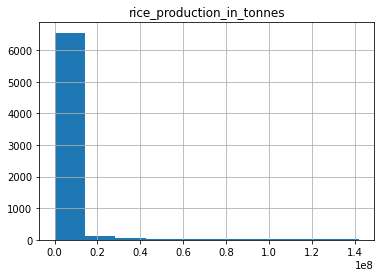

In [149]:
rice_production.hist('rice_production_in_tonnes');

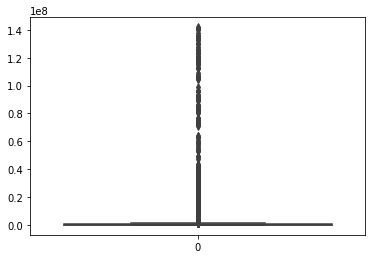

In [153]:
sns.boxplot(data=rice_production['rice_production_in_tonnes']);

In [161]:
rice_per_country = rice_production.groupby('iso').sum()[['rice_production_in_tonnes']].sort_values(by='rice_production_in_tonnes', ascending=False)

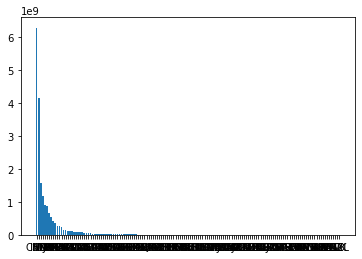

In [164]:
plt.bar(rice_per_country.index, rice_per_country['rice_production_in_tonnes']);

In [165]:
top_10 = rice_per_country.iloc[:10, ]

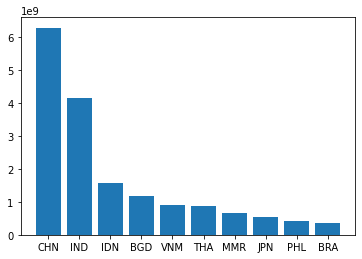

In [166]:
plt.bar(top_10.index, top_10['rice_production_in_tonnes']);

In [167]:
total_rice = rice_production['rice_production_in_tonnes'].sum()
china = top_10[top_10.index == 'CHN']/total_rice
india = top_10[top_10.index == 'IND']/total_rice
print(china, india)

     rice_production_in_tonnes
iso                           
CHN                   0.319927      rice_production_in_tonnes
iso                           
IND                   0.211017


China is responsible for 32% of the global rice production during 1961-2019.
India is responsible for 21% of the global rice production during 1961-2019.